<a href="https://colab.research.google.com/github/musthafa145/EDA_txt2img_oldbookillustrations/blob/main/EDA_Txt2img_oldbookillustrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install/upgrade datasets and huggingface_hub
!pip install --upgrade datasets huggingface_hub pillow

In [7]:
from huggingface_hub import login
from google.colab import userdata

# Log in to Hugging Face Hub using the token stored in Colab secrets
try:
    hf_token = userdata.get('HF_TOKEN')
    login(token=hf_token)
    print("Successfully logged in to Hugging Face Hub.")
except Exception as e:
    print(f"Could not log in to Hugging Face Hub. Please check your HF_TOKEN in Colab secrets. Error: {e}")

Successfully logged in to Hugging Face Hub.


Attempting to load the dataset directly...


README.md:   0%|          | 0.00/782 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/407M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]


Dataset loaded successfully!

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 1000
    })
})

Example from the dataset (first item in the 'train' split):
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1158x1600 at 0x7A073A5E6A90>, 'text': 'A bald man with a long beard smiles faintly as he carries on his back a little girl wearing his hat'}

Displaying the first image...


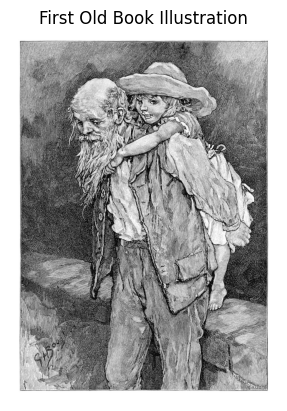

In [8]:
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt

print("Attempting to load the dataset directly...")
try:
    ds = load_dataset("AdamLucek/oldbookillustrations-small")

    print("\nDataset loaded successfully!")
    print("\nDataset structure:")
    print(ds)

    print("\nExample from the dataset (first item in the 'train' split):")
    first_example = ds['train'][0]
    print(first_example)

    # Display the image if the 'image' feature is present
    if 'image' in first_example:
        print("\nDisplaying the first image...")
        img = first_example['image']
        plt.imshow(img)
        plt.axis('off')
        plt.title("First Old Book Illustration")
        plt.show()
    else:
        print("\n'image' column not found directly. Check dataset features.")

except Exception as e:
    print(f"\nAn error occurred during direct loading: {e}")
    print("Please double-check the dataset page on Hugging Face Hub for its exact structure and any specific loading instructions if this error persists.")


--- Simple EDA ---
Number of samples in the 'train' split: 1000

Dataset Features:
{'image': Image(mode=None, decode=True), 'text': Value('string')}

More examples from the dataset:

Example 1:
Text: A bald man with a long beard smiles faintly as he carries on his back a little girl wearing his hat
Image:


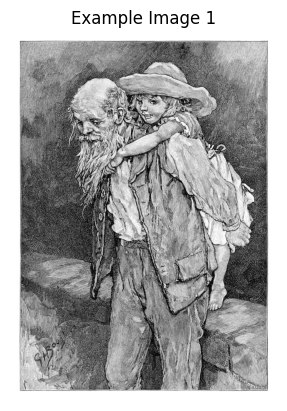


Example 2:
Text: Dante stumbles against the traitor Bocca degli Abati caught with others in the ice a frozen lake
Image:


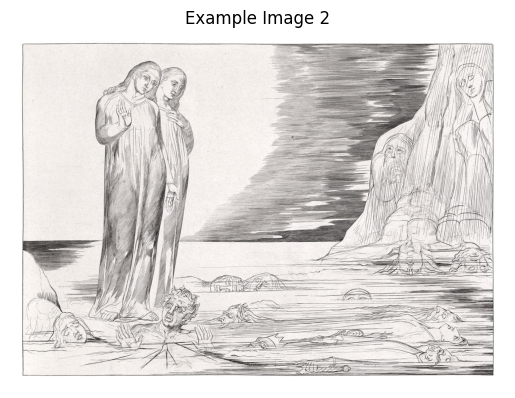


Example 3:
Text: View of the Arno at Florence with a section of the Ponte alla Carraia busy with people and carts
Image:


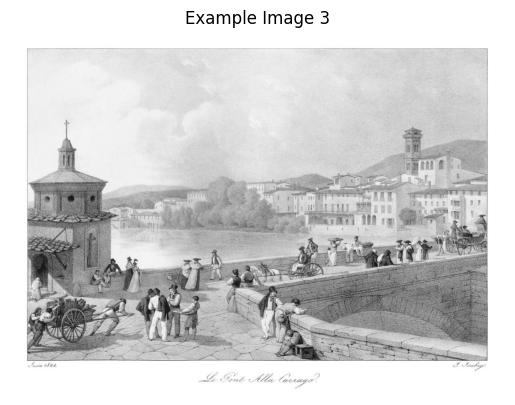


--- EDA Complete ---


In [9]:
print("\n--- Simple EDA ---")

# Number of samples in the train split
num_samples_train = ds['train'].num_rows
print(f"Number of samples in the 'train' split: {num_samples_train}")

# Dataset features
print("\nDataset Features:")
print(ds['train'].features)

# Display a few more examples
print("\nMore examples from the dataset:")
for i in range(3): # Displaying the first 3 examples
    example = ds['train'][i]
    print(f"\nExample {i+1}:")
    print(f"Text: {example['text']}")
    if 'image' in example:
        print("Image:")
        plt.imshow(example['image'])
        plt.axis('off')
        plt.title(f"Example Image {i+1}")
        plt.show()
    else:
        print("'image' column not found for this example.")

print("\n--- EDA Complete ---")

In [11]:
!pip install wordcloud opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 19.1 MB/s eta 0:00:00


EXPLORATORY DATA ANALYSIS: OLD BOOK ILLUSTRATIONS DATASET
✓ Total samples: 1000
✓ Features: ['image', 'text']

2. DATASET OVERVIEW
----------------------------------------
Dataset size: 1000 samples
Features: {'image': Image(mode=None, decode=True), 'text': Value('string')}
Dataset splits: ['train']

3. EXTRACTING IMAGE METADATA...
Processing images (this may take a moment)...
  Processed 100/1000 images...
  Processed 200/1000 images...
  Processed 300/1000 images...
  Processed 400/1000 images...
  Processed 500/1000 images...
  Processed 600/1000 images...
  Processed 700/1000 images...
  Processed 800/1000 images...
  Processed 900/1000 images...
  Processed 1000/1000 images...
✓ Metadata extraction complete!

4. IMAGE ANALYSIS
----------------------------------------
Image dimensions statistics:
  Width  - Min: 477, Max: 2080, Mean: 1311.0
  Height - Min: 577, Max: 2472, Mean: 1463.6
  Aspect Ratio - Min: 0.30, Max: 2.77, Mean: 0.95


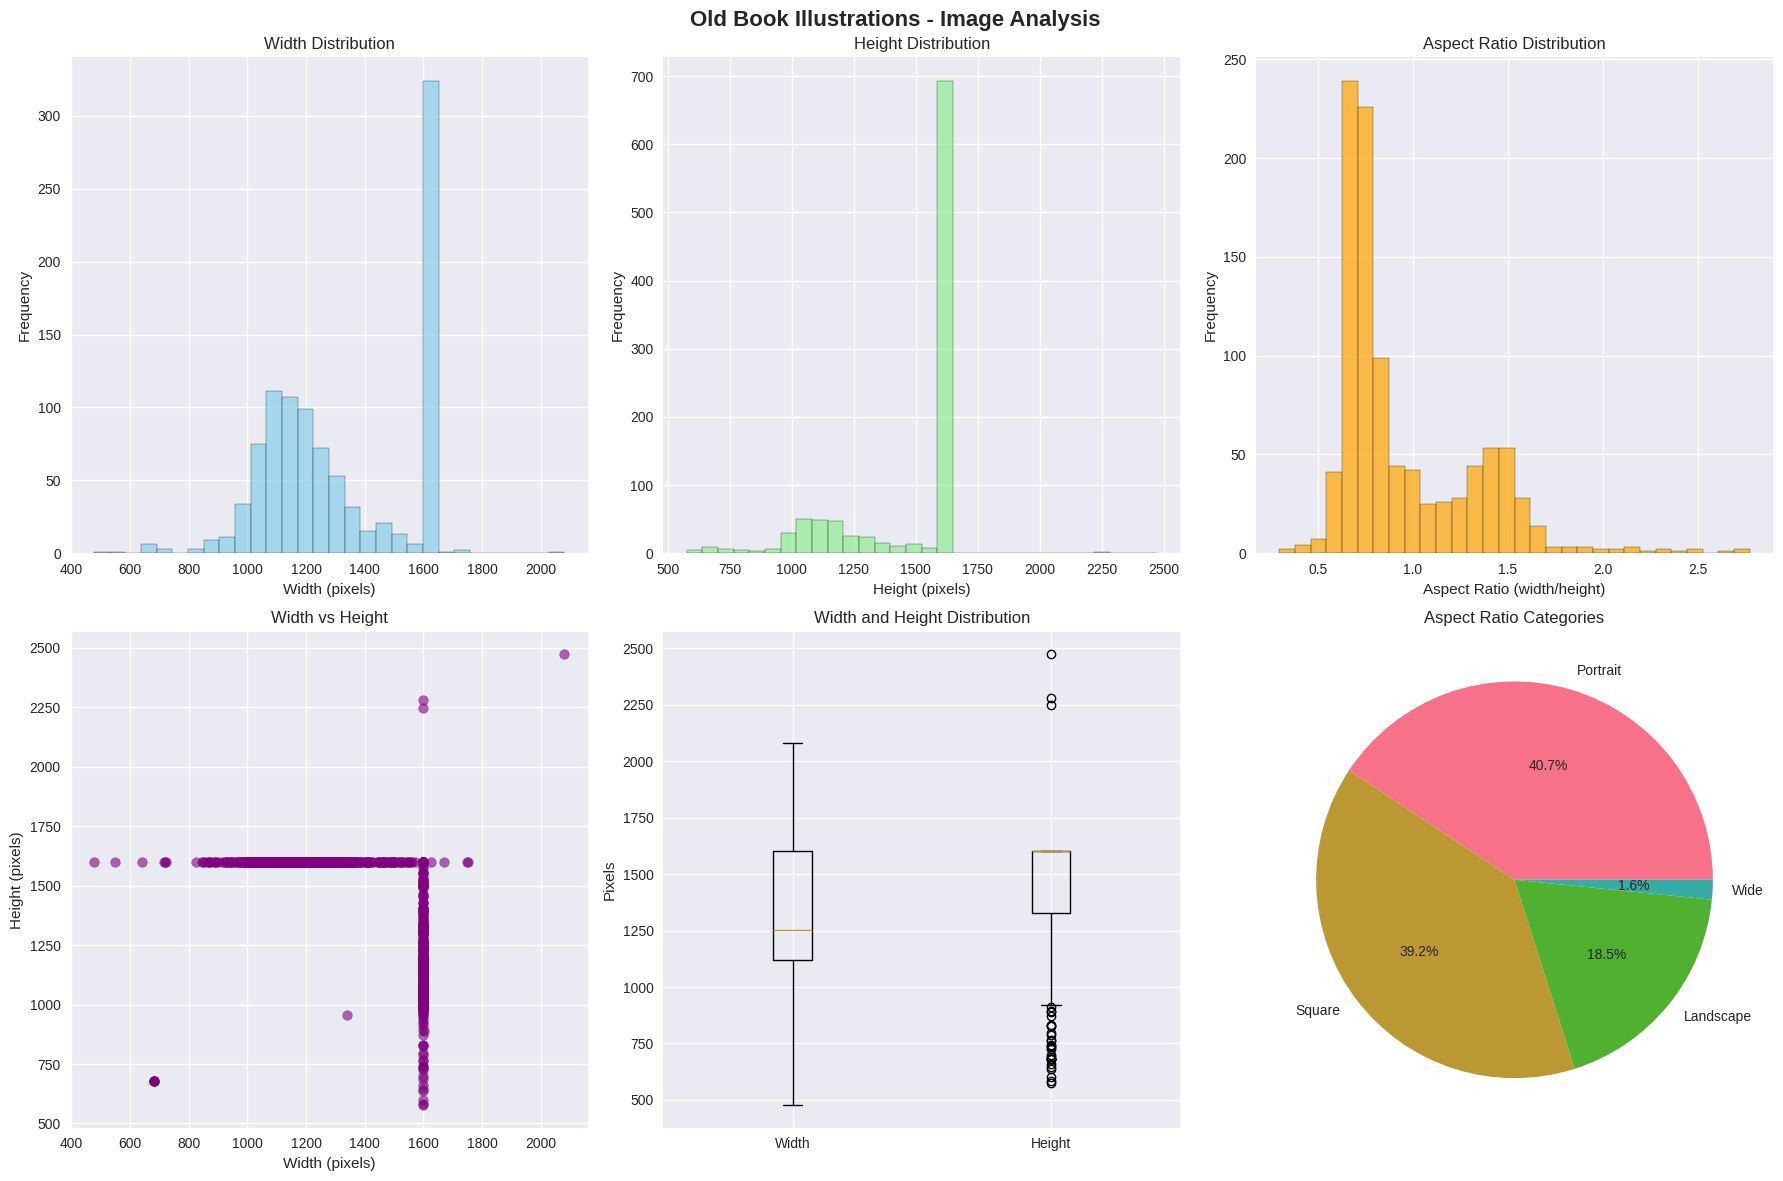


5. TEXT ANALYSIS
----------------------------------------
Text statistics:
  Character length - Min: 4, Max: 134, Mean: 58.2
  Word count - Min: 1, Max: 23, Mean: 10.7
  Sentence count - Min: 0, Max: 0, Mean: 0.0


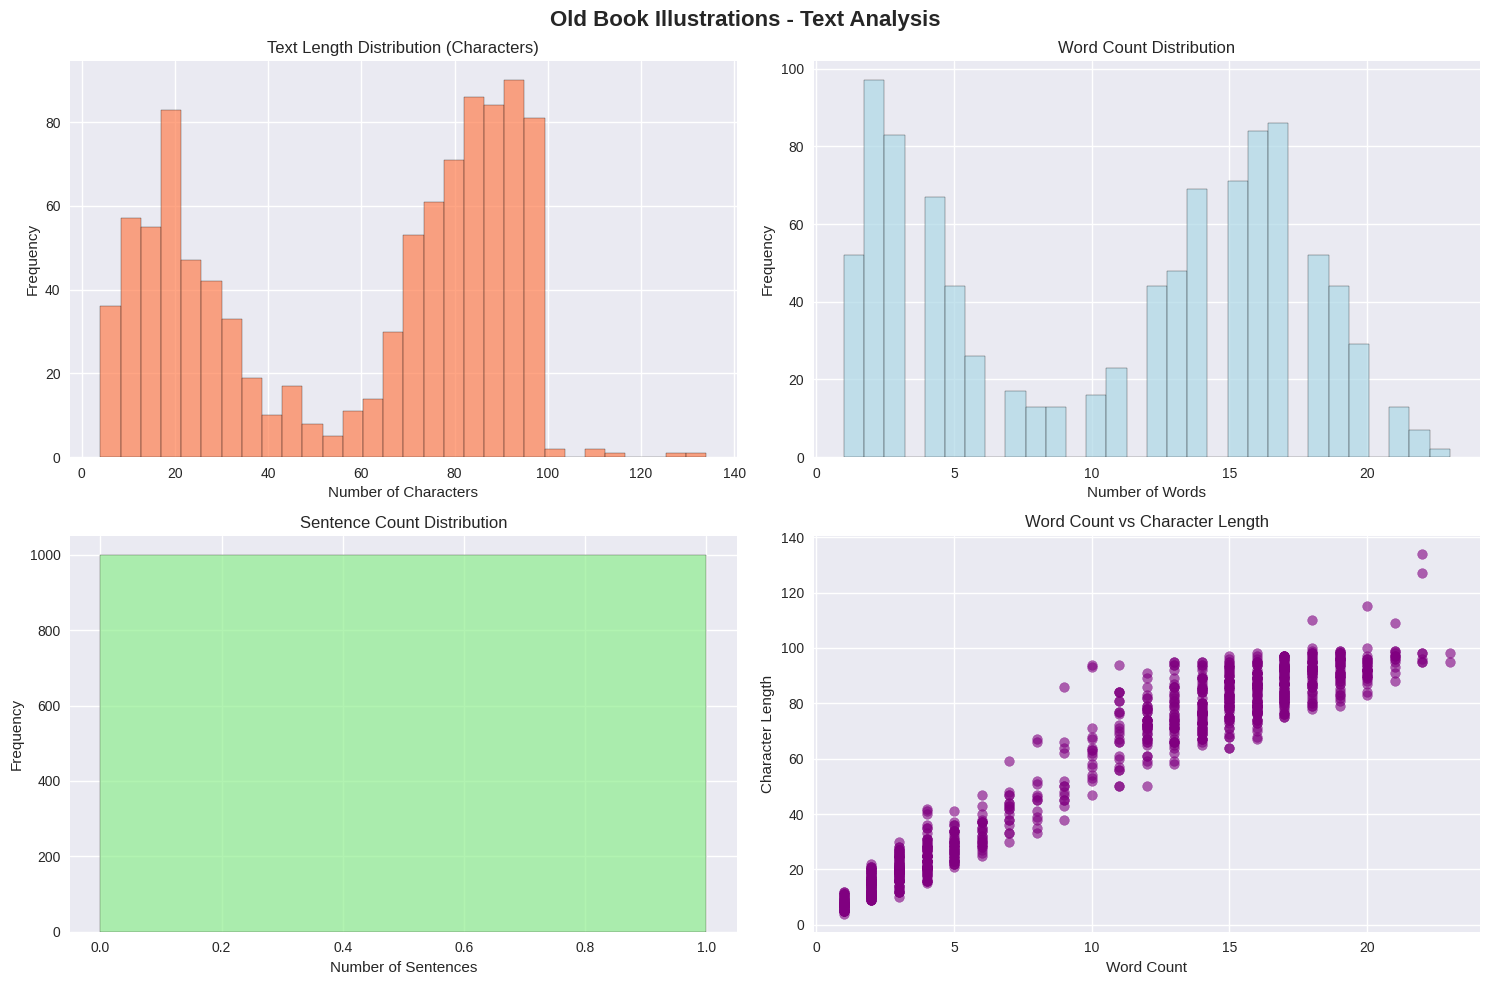


6. WORD FREQUENCY ANALYSIS
----------------------------------------
Total unique words: 3079
Total words: 10713
Top 20 most common words:
  a: 1063
  the: 630
  of: 409
  in: 277
  and: 253
  with: 193
  on: 161
  man: 137
  to: 137
  is: 106
  woman: 98
  at: 93
  as: 92
  his: 87
  from: 83
  showing: 79
  an: 77
  by: 65
  seen: 57
  are: 57

7. GENERATING WORD CLOUD...


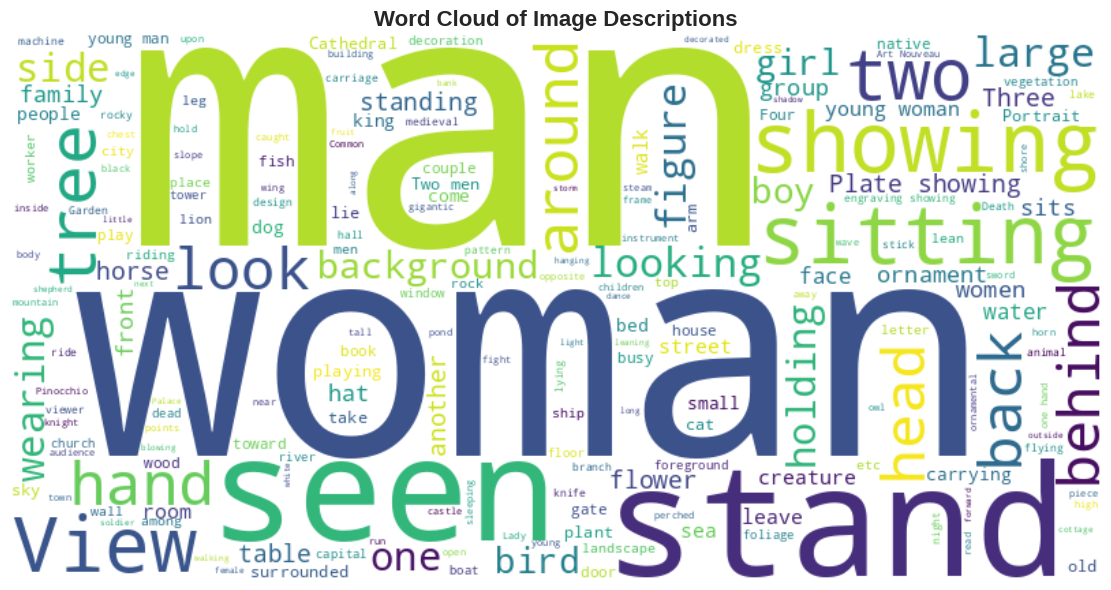


8. SAMPLE IMAGES SHOWCASE
----------------------------------------


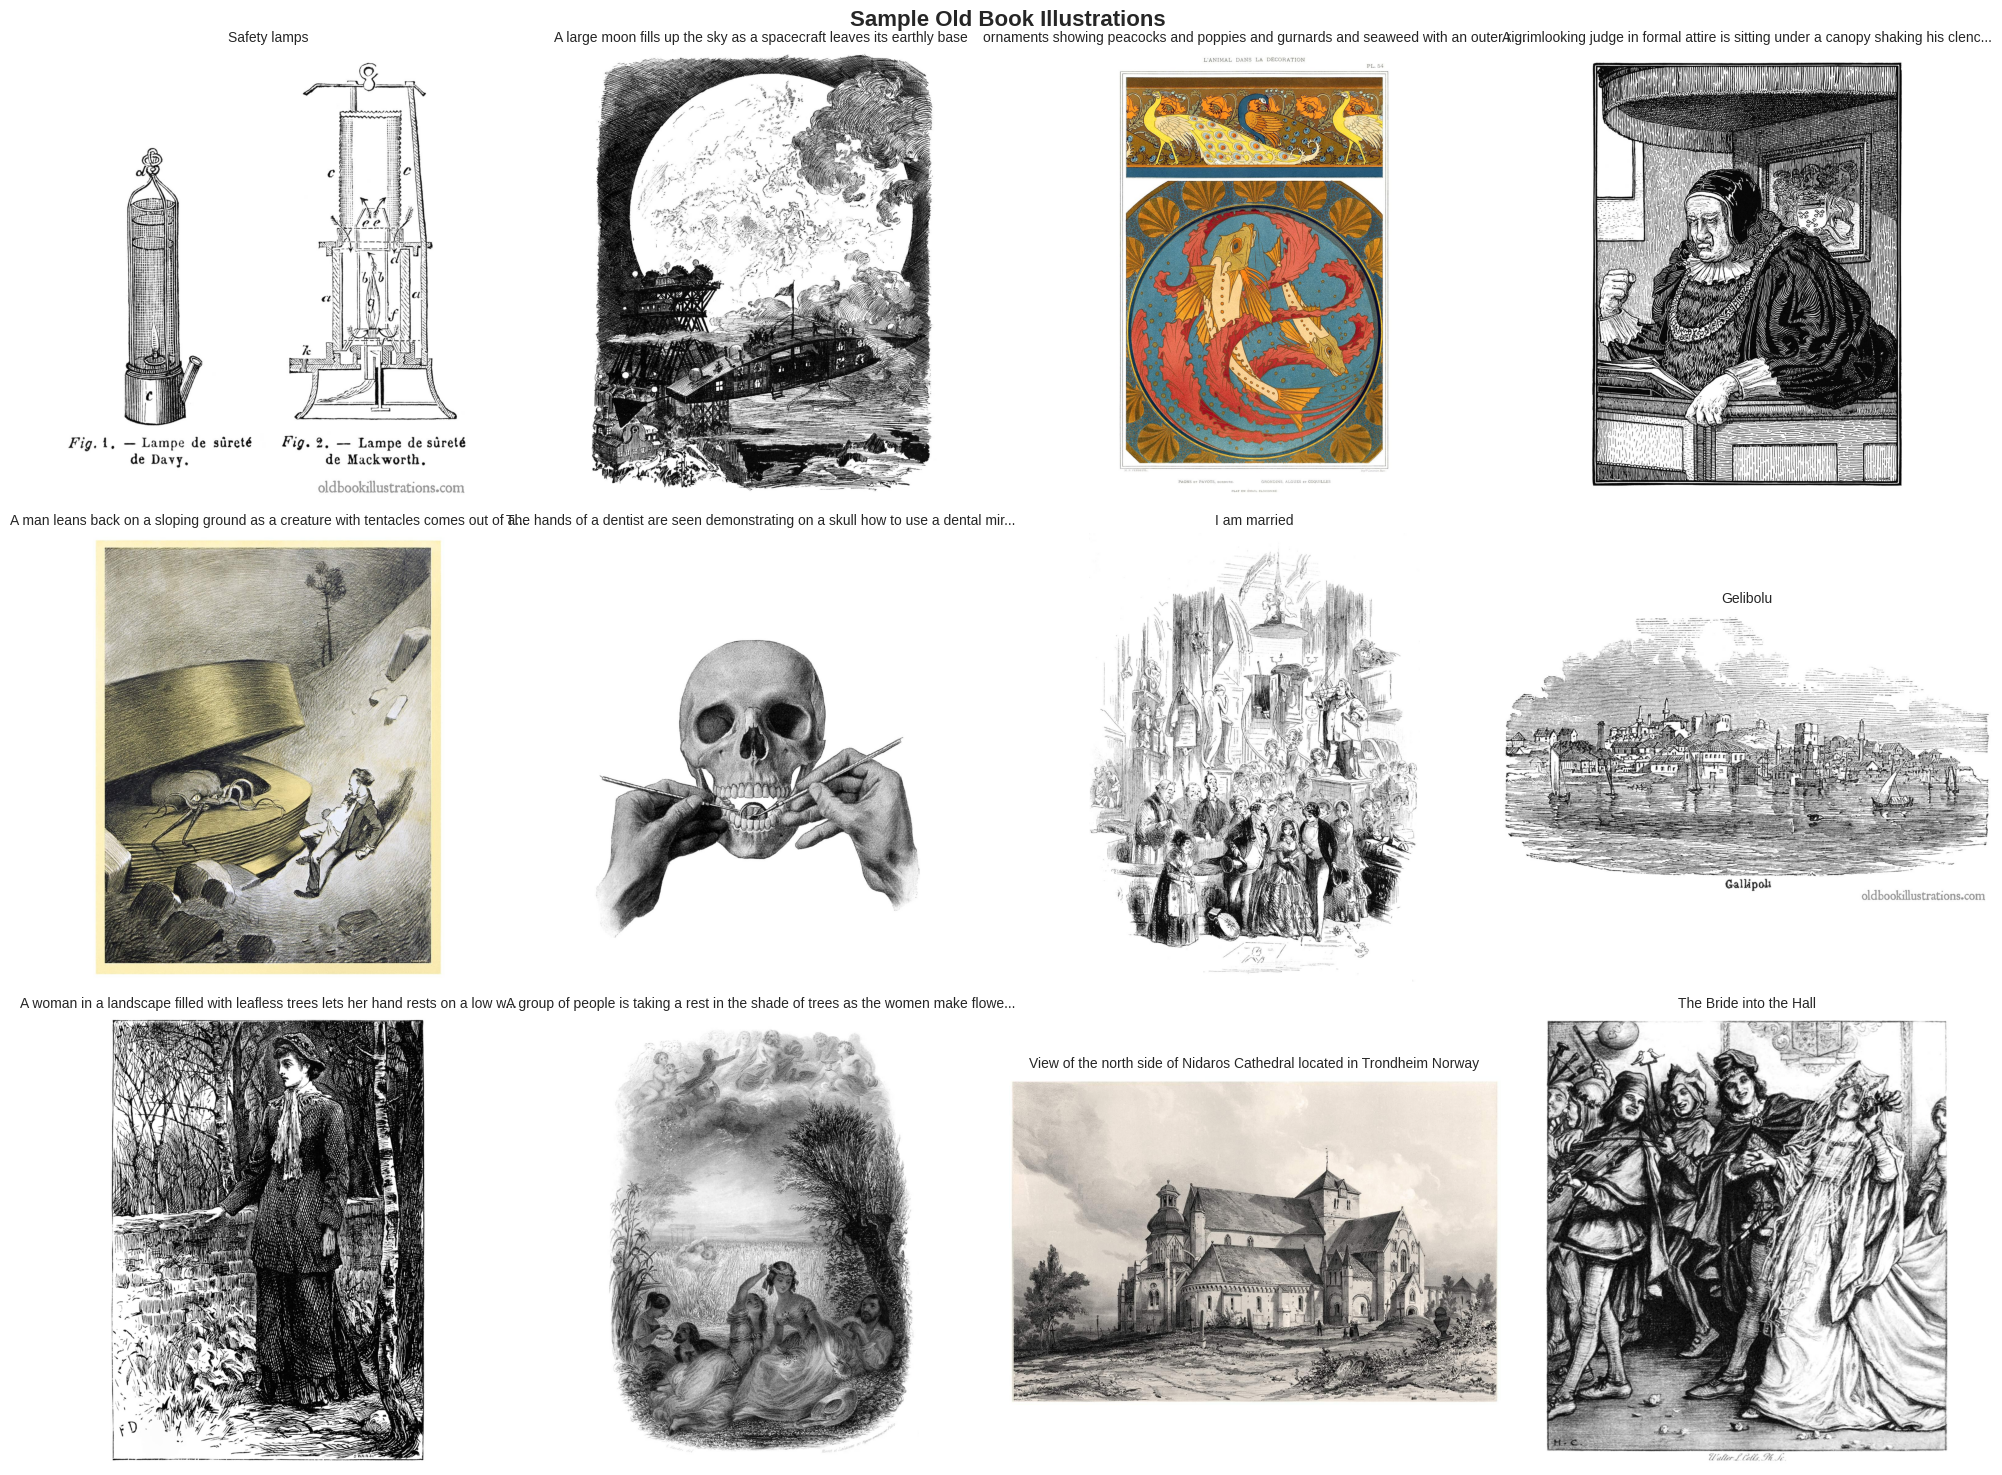


9. CORRELATION ANALYSIS
----------------------------------------


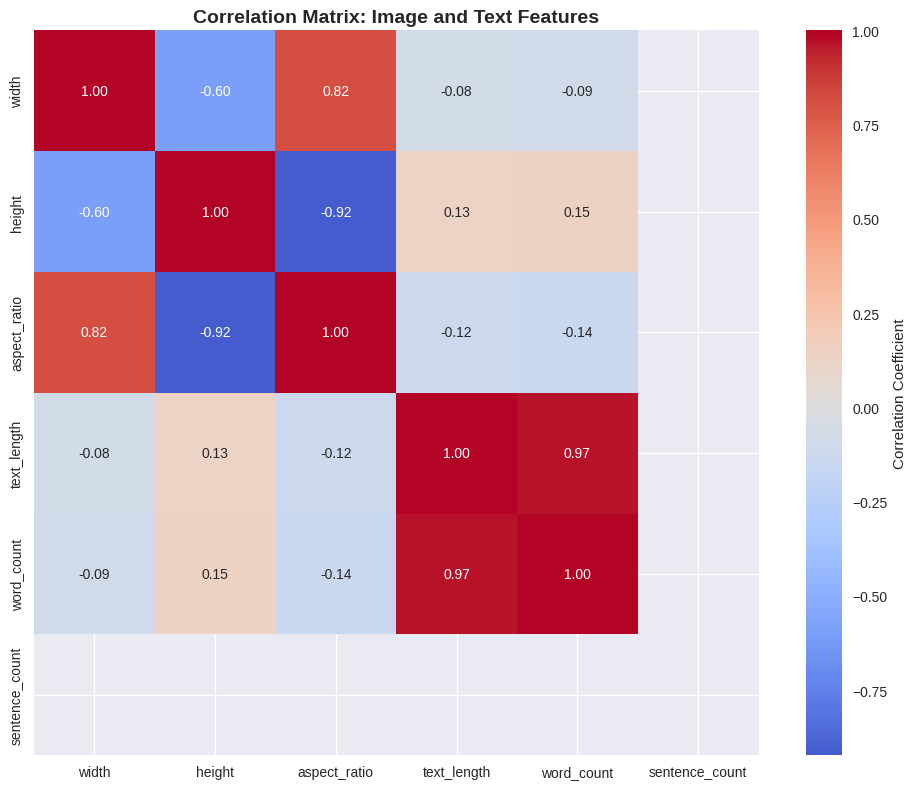

Correlation insights:
  width ↔ height: -0.599
  width ↔ aspect_ratio: 0.818
  height ↔ aspect_ratio: -0.922
  text_length ↔ word_count: 0.966

10. SUMMARY STATISTICS
----------------------------------------
            width       height  aspect_ratio  text_length   word_count  \
count  1000.00000  1000.000000   1000.000000  1000.000000  1000.000000   
mean   1310.96000  1463.582000      0.950681    58.204000    10.706000   
std     239.76475   241.375279      0.361630    32.120805     6.452534   
min     477.00000   577.000000      0.298125     4.000000     1.000000   
25%    1117.75000  1327.750000      0.699375    23.000000     4.000000   
50%    1253.00000  1600.000000      0.783750    72.000000    13.000000   
75%    1600.00000  1600.000000      1.203008    87.000000    16.000000   
max    2080.00000  2472.000000      2.772964   134.000000    23.000000   

       sentence_count  
count          1000.0  
mean              0.0  
std               0.0  
min               0.0  
25%  

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from PIL import Image
import cv2
from collections import Counter
import re
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("EXPLORATORY DATA ANALYSIS: OLD BOOK ILLUSTRATIONS DATASET")
print("=" * 60)


train_data = ds['train']

print(f"✓ Total samples: {len(train_data)}")
print(f"✓ Features: {list(train_data.features.keys())}")

# Basic dataset information
print("\n2. DATASET OVERVIEW")
print("-" * 40)
print(f"Dataset size: {len(train_data)} samples")
print(f"Features: {train_data.features}")
print(f"Dataset splits: {list(ds.keys())}")

# Convert to pandas for easier analysis
data_dict = {'image': [], 'text': [], 'image_size': [], 'aspect_ratio': []}
print("\n3. EXTRACTING IMAGE METADATA...")
print("Processing images (this may take a moment)...")

for i in range(len(train_data)):
    sample = train_data[i]
    img = sample['image']
    text = sample['text']

    # Store basic info
    data_dict['image'].append(img)
    data_dict['text'].append(text)
    data_dict['image_size'].append(img.size)
    data_dict['aspect_ratio'].append(img.width / img.height)

    if (i + 1) % 100 == 0:
        print(f"  Processed {i + 1}/{len(train_data)} images...")

df = pd.DataFrame(data_dict)
print("✓ Metadata extraction complete!")

# 4. IMAGE ANALYSIS
print("\n4. IMAGE ANALYSIS")
print("-" * 40)

# Extract width and height
df['width'] = df['image_size'].apply(lambda x: x[0])
df['height'] = df['image_size'].apply(lambda x: x[1])

print(f"Image dimensions statistics:")
print(f"  Width  - Min: {df['width'].min()}, Max: {df['width'].max()}, Mean: {df['width'].mean():.1f}")
print(f"  Height - Min: {df['height'].min()}, Max: {df['height'].max()}, Mean: {df['height'].mean():.1f}")
print(f"  Aspect Ratio - Min: {df['aspect_ratio'].min():.2f}, Max: {df['aspect_ratio'].max():.2f}, Mean: {df['aspect_ratio'].mean():.2f}")

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Old Book Illustrations - Image Analysis', fontsize=16, fontweight='bold')

# Width distribution
axes[0, 0].hist(df['width'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Width Distribution')
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Frequency')

# Height distribution
axes[0, 1].hist(df['height'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Height Distribution')
axes[0, 1].set_xlabel('Height (pixels)')
axes[0, 1].set_ylabel('Frequency')

# Aspect ratio distribution
axes[0, 2].hist(df['aspect_ratio'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0, 2].set_title('Aspect Ratio Distribution')
axes[0, 2].set_xlabel('Aspect Ratio (width/height)')
axes[0, 2].set_ylabel('Frequency')

# Scatter plot: width vs height
axes[1, 0].scatter(df['width'], df['height'], alpha=0.6, color='purple')
axes[1, 0].set_title('Width vs Height')
axes[1, 0].set_xlabel('Width (pixels)')
axes[1, 0].set_ylabel('Height (pixels)')

# Box plot for dimensions
box_data = [df['width'], df['height']]
axes[1, 1].boxplot(box_data, labels=['Width', 'Height'])
axes[1, 1].set_title('Width and Height Distribution')
axes[1, 1].set_ylabel('Pixels')

# Aspect ratio categories
aspect_categories = pd.cut(df['aspect_ratio'],
                          bins=[0, 0.75, 1.33, 2.0, float('inf')],
                          labels=['Portrait', 'Square', 'Landscape', 'Wide'])
aspect_counts = aspect_categories.value_counts()
axes[1, 2].pie(aspect_counts.values, labels=aspect_counts.index, autopct='%1.1f%%')
axes[1, 2].set_title('Aspect Ratio Categories')

plt.tight_layout()
plt.show()

# 5. TEXT ANALYSIS
print("\n5. TEXT ANALYSIS")
print("-" * 40)

# Basic text statistics
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['sentence_count'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))

print(f"Text statistics:")
print(f"  Character length - Min: {df['text_length'].min()}, Max: {df['text_length'].max()}, Mean: {df['text_length'].mean():.1f}")
print(f"  Word count - Min: {df['word_count'].min()}, Max: {df['word_count'].max()}, Mean: {df['word_count'].mean():.1f}")
print(f"  Sentence count - Min: {df['sentence_count'].min()}, Max: {df['sentence_count'].max()}, Mean: {df['sentence_count'].mean():.1f}")

# Text length distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Old Book Illustrations - Text Analysis', fontsize=16, fontweight='bold')

# Character length distribution
axes[0, 0].hist(df['text_length'], bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[0, 0].set_title('Text Length Distribution (Characters)')
axes[0, 0].set_xlabel('Number of Characters')
axes[0, 0].set_ylabel('Frequency')

# Word count distribution
axes[0, 1].hist(df['word_count'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 1].set_title('Word Count Distribution')
axes[0, 1].set_xlabel('Number of Words')
axes[0, 1].set_ylabel('Frequency')

# Sentence count distribution
axes[1, 0].hist(df['sentence_count'], bins=range(0, df['sentence_count'].max() + 2),
                alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Sentence Count Distribution')
axes[1, 0].set_xlabel('Number of Sentences')
axes[1, 0].set_ylabel('Frequency')

# Correlation between text length and word count
axes[1, 1].scatter(df['word_count'], df['text_length'], alpha=0.6, color='purple')
axes[1, 1].set_title('Word Count vs Character Length')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Character Length')

plt.tight_layout()
plt.show()

# 6. WORD FREQUENCY ANALYSIS
print("\n6. WORD FREQUENCY ANALYSIS")
print("-" * 40)

# Combine all text and analyze word frequency
all_text = ' '.join(df['text'].tolist())
words = re.findall(r'\b\w+\b', all_text.lower())
word_counts = Counter(words)

print(f"Total unique words: {len(word_counts)}")
print(f"Total words: {len(words)}")
print(f"Top 20 most common words:")
for word, count in word_counts.most_common(20):
    print(f"  {word}: {count}")

# Word cloud
print("\n7. GENERATING WORD CLOUD...")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Image Descriptions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 8. SAMPLE IMAGES SHOWCASE
print("\n8. SAMPLE IMAGES SHOWCASE")
print("-" * 40)

# Display a grid of sample images with their descriptions
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Sample Old Book Illustrations', fontsize=16, fontweight='bold')

sample_indices = np.random.choice(len(df), 12, replace=False)

for i, idx in enumerate(sample_indices):
    row = i // 4
    col = i % 4

    img = df.iloc[idx]['image']
    text = df.iloc[idx]['text']

    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    # Truncate long descriptions
    short_text = text[:80] + "..." if len(text) > 80 else text
    axes[row, col].set_title(short_text, fontsize=10, wrap=True)

plt.tight_layout()
plt.show()

# 9. CORRELATION ANALYSIS
print("\n9. CORRELATION ANALYSIS")
print("-" * 40)

# Create correlation matrix
correlation_data = df[['width', 'height', 'aspect_ratio', 'text_length', 'word_count', 'sentence_count']].copy()
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix: Image and Text Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation insights:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:  # Only show moderate to strong correlations
            print(f"  {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

# 10. SUMMARY STATISTICS
print("\n10. SUMMARY STATISTICS")
print("-" * 40)

summary_stats = df[['width', 'height', 'aspect_ratio', 'text_length', 'word_count', 'sentence_count']].describe()
print(summary_stats)

# 11. DATA QUALITY ASSESSMENT
print("\n11. DATA QUALITY ASSESSMENT")
print("-" * 40)

print("Checking for potential data quality issues:")

# Check for missing values
print(f"Missing values:")
print(f"  Images: {df['image'].isna().sum()}")
print(f"  Text: {df['text'].isna().sum()}")

# Check for empty descriptions
empty_descriptions = df[df['text'].str.strip() == ''].shape[0]
print(f"  Empty descriptions: {empty_descriptions}")

# Check for very short descriptions
very_short = df[df['text_length'] < 20].shape[0]
print(f"  Very short descriptions (< 20 chars): {very_short}")

# Check for very long descriptions
very_long = df[df['text_length'] > 200].shape[0]
print(f"  Very long descriptions (> 200 chars): {very_long}")

# Check for duplicate descriptions
duplicate_texts = df['text'].duplicated().sum()
print(f"  Duplicate descriptions: {duplicate_texts}")

print("\n" + "=" * 60)
print("EDA COMPLETE")
print("=" * 60)
print(f"✓ Analyzed {len(df)} old book illustrations")
print(f"✓ Generated comprehensive visualizations")
print(f"✓ Performed text and image analysis")
print(f"✓ Identified key patterns and correlations")
print("=" * 60)

In [1]:
!mkdir test